In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

defaultdict(<function plot_horizontal_graphs_for_pairs.<locals>.<lambda> at 0x790d79f2cea0>, {'250': {'attack': ['sql-inj-tcp-ip-vi-all-16-40-16-42-349_250_1_.csv'], 'normal': ['sql-inj-tcp-ip-vi-all-16-40-16-42-775_250_0_.csv']}, '50': {'attack': ['sql-inj-tcp-ip-vi-all-16-40-16-42-349_50_1_.csv'], 'normal': ['sql-inj-tcp-ip-vi-all-16-40-16-42-775_50_0_.csv']}, '10': {'attack': ['sql-inj-tcp-ip-vi-all-16-40-16-42-349_10_1_.csv'], 'normal': ['sql-inj-tcp-ip-vi-all-16-40-16-42-775_10_0_.csv']}, '100': {'attack': ['sql-inj-tcp-ip-vi-all-16-40-16-42-349_100_1_.csv'], 'normal': ['sql-inj-tcp-ip-vi-all-16-40-16-42-775_100_0_.csv']}, '500': {'attack': [], 'normal': ['sql-inj-tcp-ip-vi-all-16-40-16-42-775_500_0_.csv']}, '750': {'attack': [], 'normal': ['sql-inj-tcp-ip-vi-all-16-40-16-42-775_750_0_.csv']}})
['sql-inj-tcp-ip-vi-all-16-40-16-42-349_250_1_.csv']
['sql-inj-tcp-ip-vi-all-16-40-16-42-775_250_0_.csv']



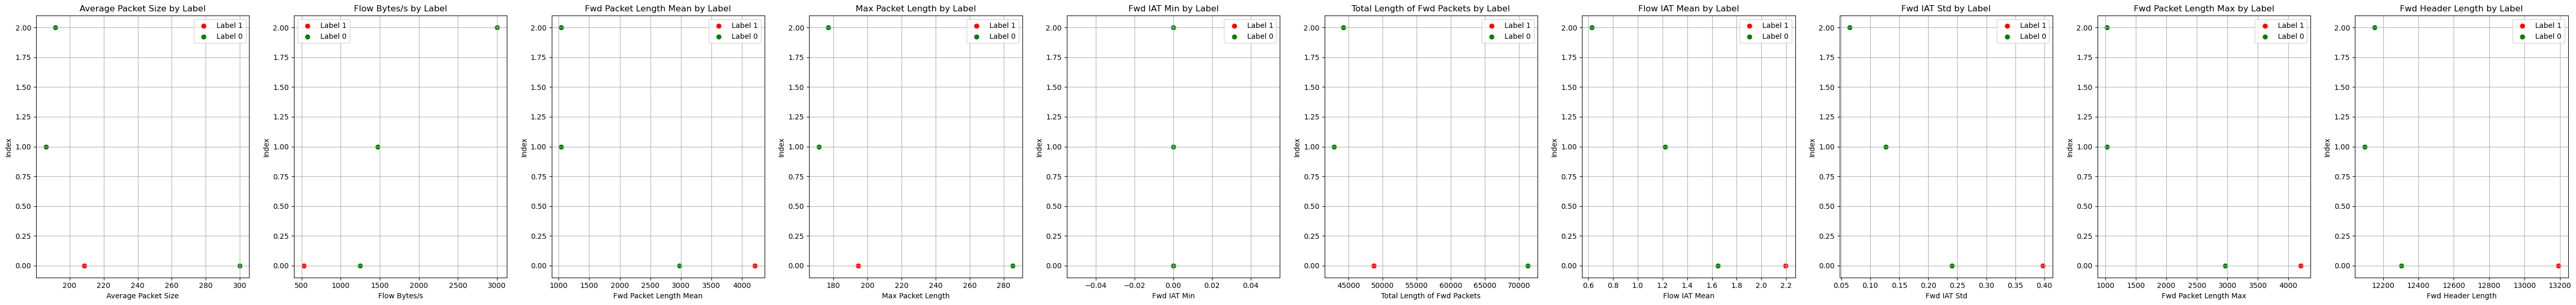

['sql-inj-tcp-ip-vi-all-16-40-16-42-349_50_1_.csv']
['sql-inj-tcp-ip-vi-all-16-40-16-42-775_50_0_.csv']



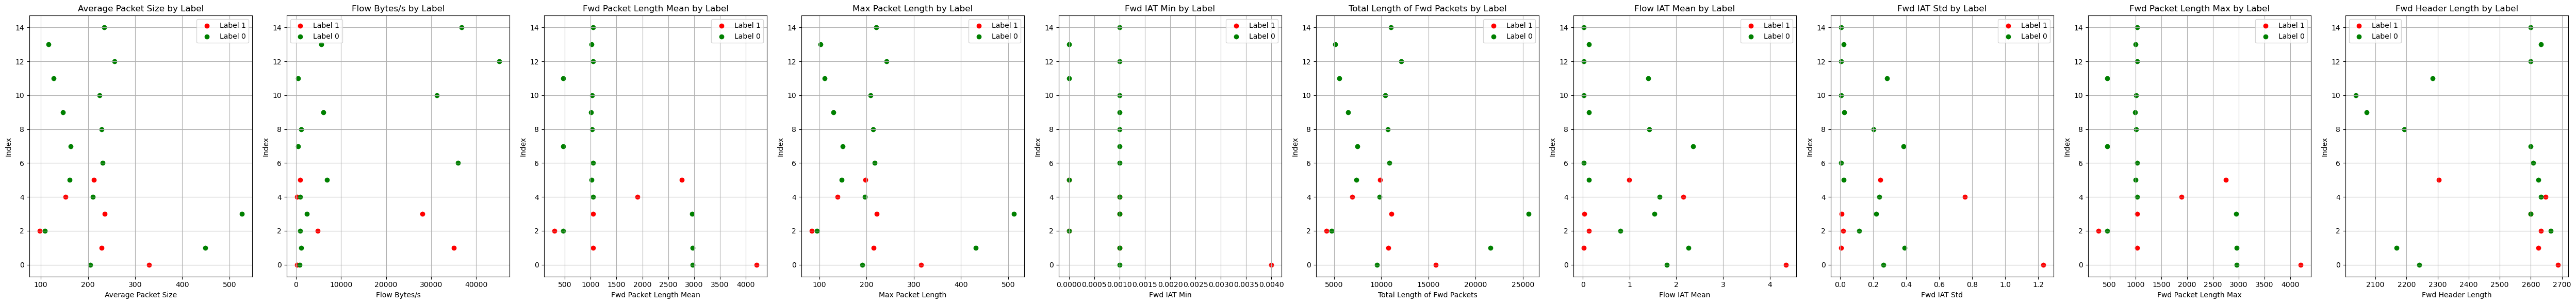

['sql-inj-tcp-ip-vi-all-16-40-16-42-349_10_1_.csv']
['sql-inj-tcp-ip-vi-all-16-40-16-42-775_10_0_.csv']



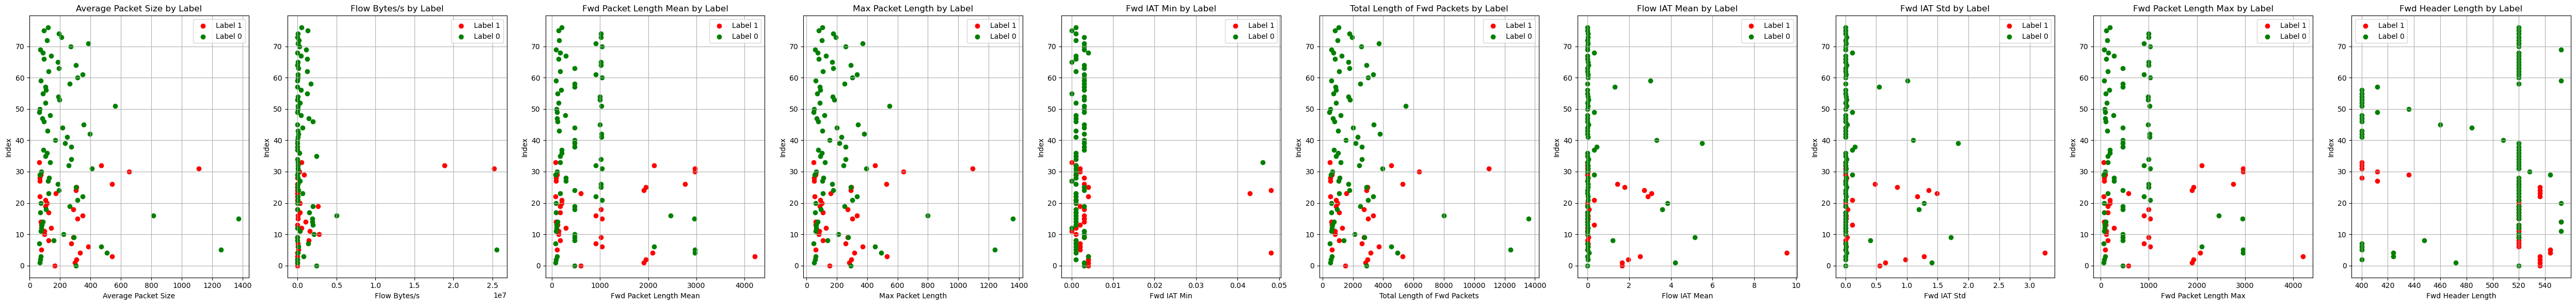

['sql-inj-tcp-ip-vi-all-16-40-16-42-349_100_1_.csv']
['sql-inj-tcp-ip-vi-all-16-40-16-42-775_100_0_.csv']



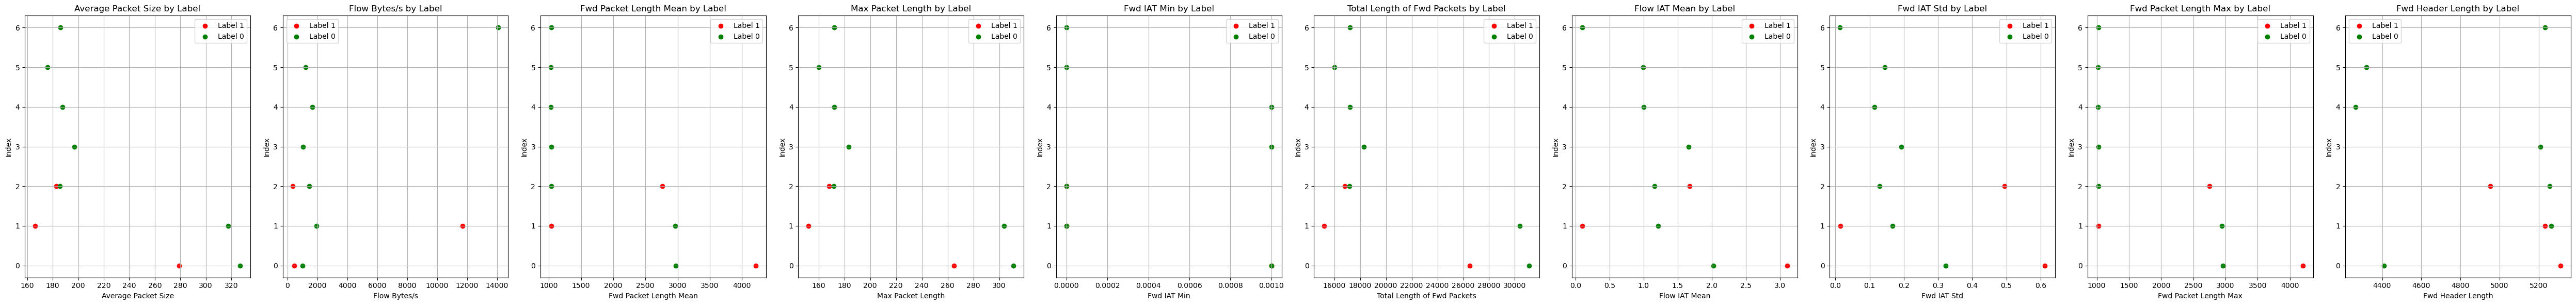

[]
['sql-inj-tcp-ip-vi-all-16-40-16-42-775_500_0_.csv']

[]
['sql-inj-tcp-ip-vi-all-16-40-16-42-775_750_0_.csv']



In [14]:
def plot_horizontal_graphs_for_pairs(attack_dir, normal_dir):
    # Словарь для хранения пар файлов по длине выборки
    pairs = defaultdict(lambda: {"attack": [], "normal": []})

    # Сопоставление файлов из папки attack и normal по длине выборки
    for file in os.listdir(attack_dir):
        if "_1_" in file:
            length = file.split("_")[-3]
            pairs[length]["attack"].append(file)

    for file in os.listdir(normal_dir):
        if "_0_" in file:
            length = file.split("_")[-3]
            pairs[length]["normal"].append(file)

    print(pairs)

    # Построение графиков для каждого набора пар
    for length, file_pairs in pairs.items():
        attack_file = sorted(file_pairs["attack"])
        normal_file = sorted(file_pairs["normal"])

        print(attack_file)
        print(normal_file)
        print()

        # Убедимся, что количество парных файлов совпадает
        if len(attack_file) == len(normal_file):
            attack_path = os.path.join(attack_dir, attack_file[0])
            normal_path = os.path.join(normal_dir, normal_file[0])

            # Загрузка данных из файлов CSV
            df_attack = pd.read_csv(attack_path)
            df_normal = pd.read_csv(normal_path)

            # Добавление идентификаторов строк для сохранения оригинальных индексов
            df_attack["Index"] = range(len(df_attack))
            df_normal["Index"] = range(len(df_normal))

            # Получаем список всех столбцов, кроме 'Label' и 'Index'
            columns = [
                col for col in df_attack.columns if col not in ["Label", "Index"]
            ]

            #
            # Начало горизонтального подграфика
            #
            
            # Создаем подграфики в одну строку
            fig, axes = plt.subplots(
                1, len(columns), figsize=(5 * len(columns), 6)
            )

            # Если у нас только один график, `axes` не будет массивом, поэтому приведем его к массиву
            if len(columns) == 1:
                axes = [axes]

            # Перебор всех столбцов и создание графиков
            for ax, column in zip(axes, columns):
                ax.scatter(
                    df_attack[column],
                    df_attack["Index"],
                    color="red",
                    label="Label 1"
                )
                ax.scatter(
                    df_normal[column],
                    df_normal["Index"],
                    color="green",
                    label="Label 0",
                )
                ax.set_title(f"{column} by Label")
                ax.set_xlabel(column)
                ax.set_ylabel("Index")
                ax.legend()
                ax.grid(True)

            # Устанавливаем плотное расположение графиков
            plt.tight_layout()

            #
            # Конец горизонтального подграфика
            #

            # Показать все графики
            plt.show()


# Пример использования функции
attack_dir = "csvs/sql-inj/attack/"
normal_dir = "csvs/sql-inj/normal/"
plot_horizontal_graphs_for_pairs(attack_dir, normal_dir)

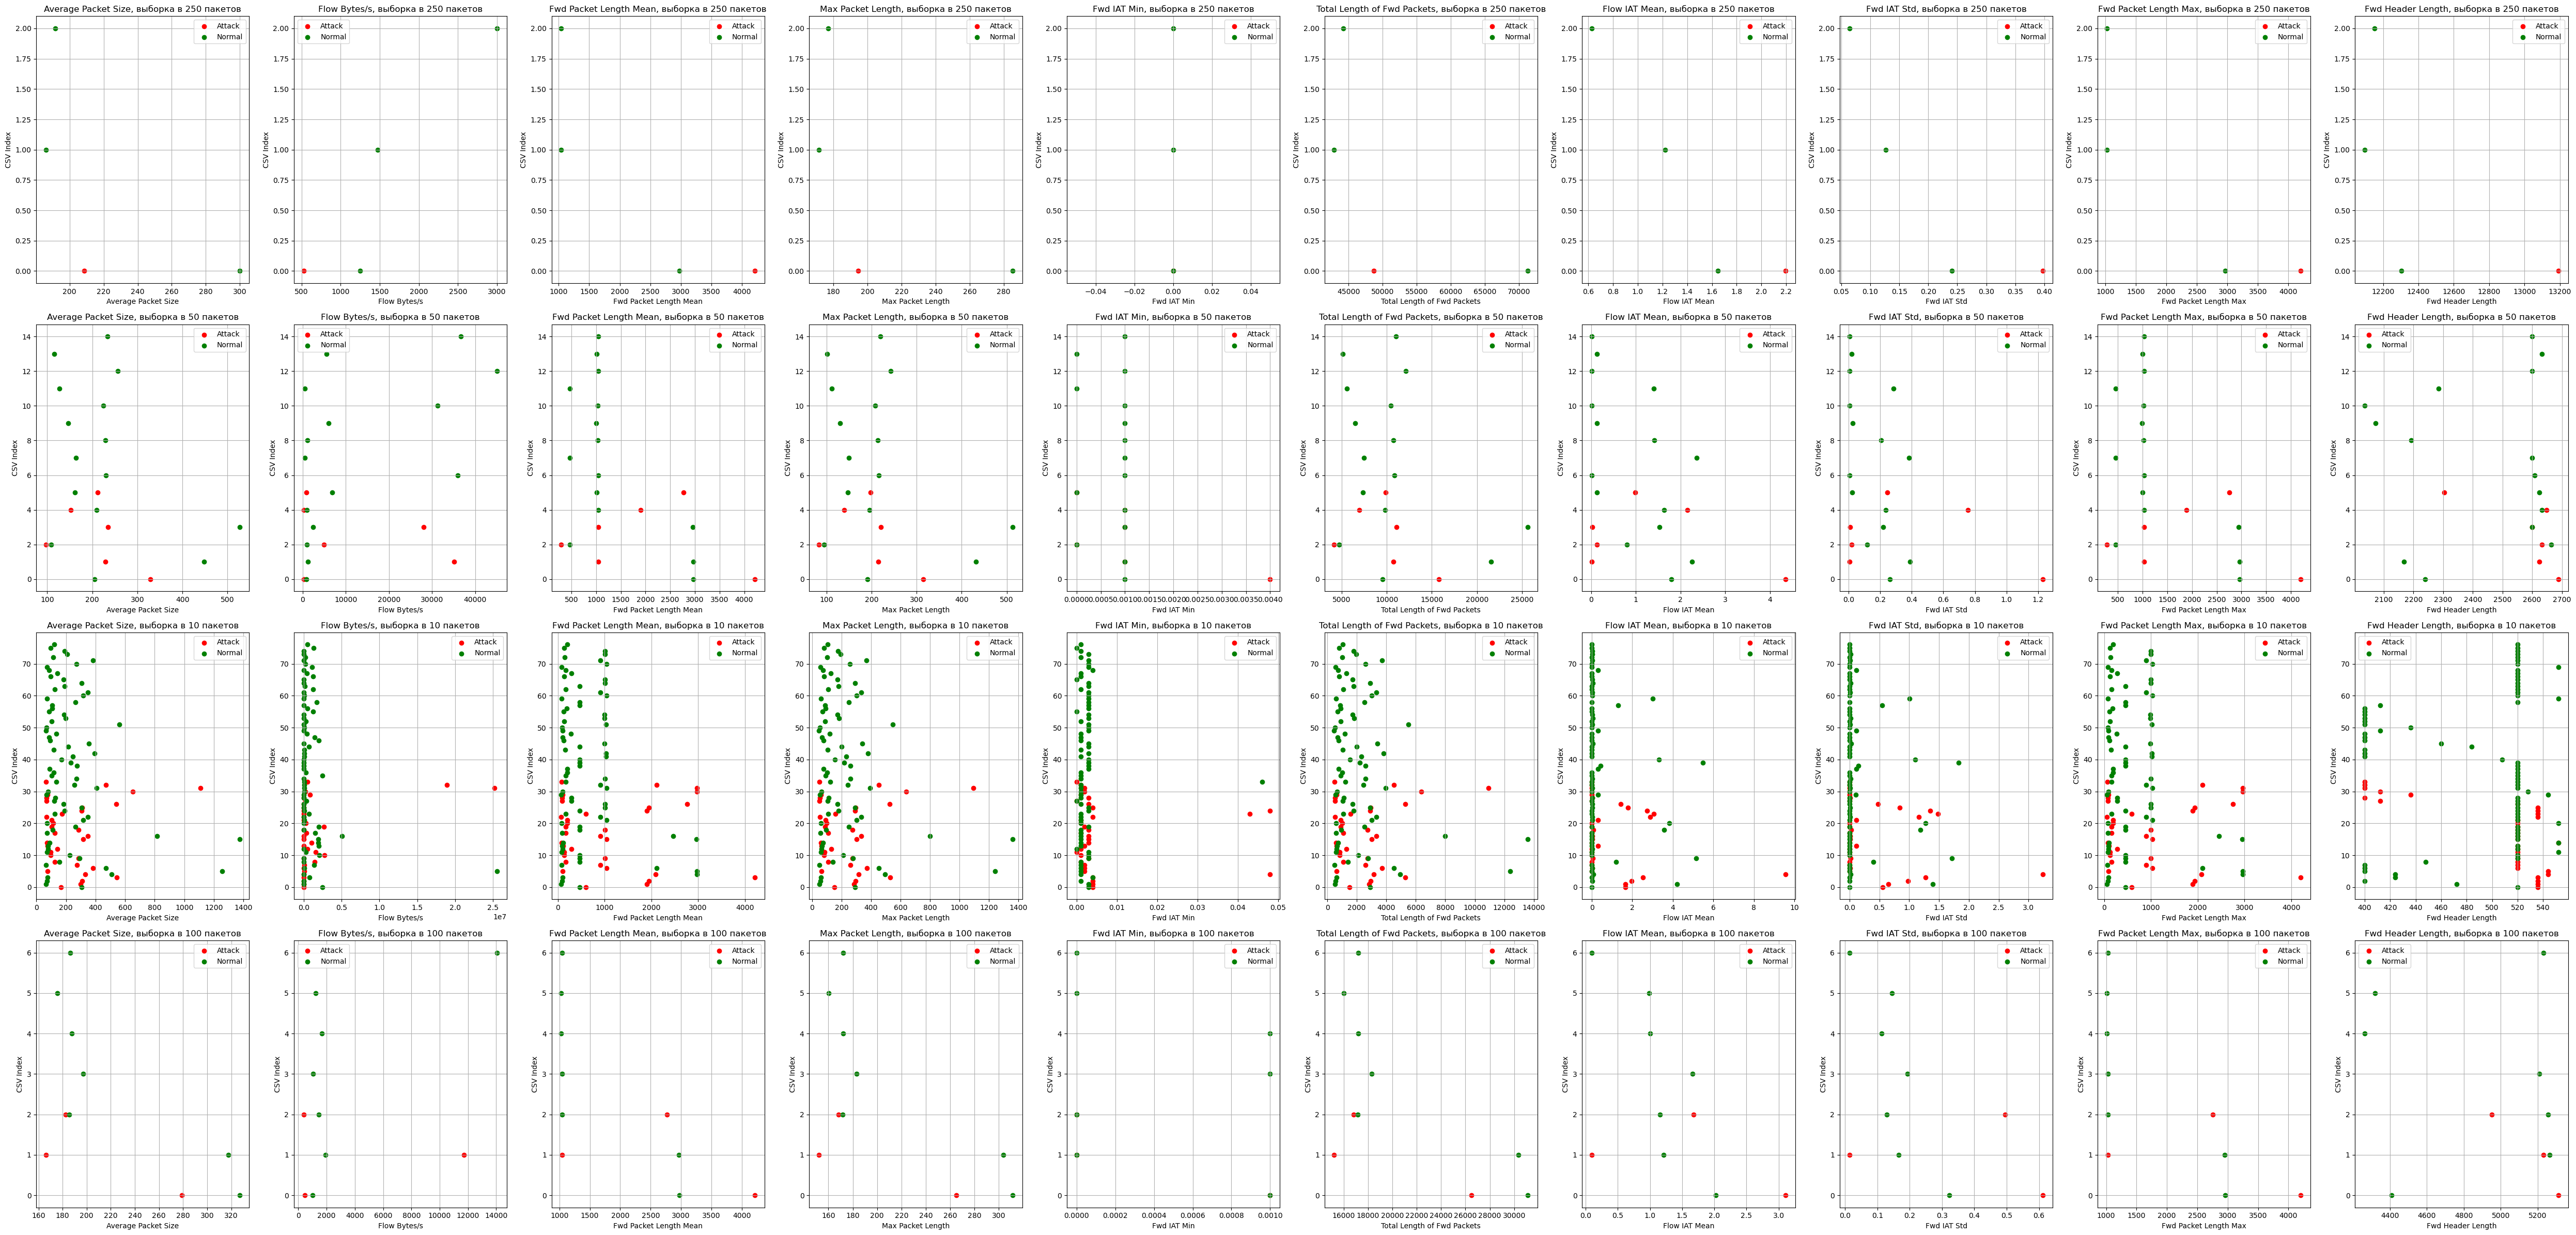

In [24]:
def plot_horizontal_graphs_for_pairs(attack_dir, normal_dir):
    # Словарь для хранения пар файлов по длине выборки
    pairs = defaultdict(lambda: {"attack": [], "normal": []})

    # Сопоставление файлов из папки attack и normal по длине выборки
    for file in os.listdir(attack_dir):
        if "_1_" in file:
            length = file.split("_")[-3]
            pairs[length]["attack"].append(file)

    for file in os.listdir(normal_dir):
        if "_0_" in file:
            length = file.split("_")[-3]
            pairs[length]["normal"].append(file)

    # Подсчет общего количества наборов
    total_pairs = 0

    # Определение столбцов на основе первого набора данных
    for length, file_pairs in pairs.items():
        attack_file = sorted(file_pairs["attack"])
        normal_file = sorted(file_pairs["normal"])

        # Убедимся, что количество парных файлов совпадает
        if len(attack_file) == len(normal_file):
            attack_path = os.path.join(attack_dir, attack_file[0])

            # Загрузка данных из файлов CSV
            df_attack = pd.read_csv(attack_path)

            # Получаем список всех столбцов, кроме 'Label' и 'Index'
            columns = [col for col in df_attack.columns if col not in ["Label", "Index"]]
            # Считаем, сколько будет строк из горизонтальных подграфиков в итоговом полотне
            total_pairs += 1

    # Создание общего полотна для всех пар файлов
    fig, axes = plt.subplots(
        total_pairs, len(columns), figsize=(5 * len(columns), 6 * total_pairs)
    )

    # Индекс для строк подграфиков
    row_idx = 0

    # Построение графиков для каждого набора пар
    for length, file_pairs in pairs.items():
        attack_file = sorted(file_pairs["attack"])
        normal_file = sorted(file_pairs["normal"])

        # Убедимся, что количество парных файлов совпадает
        if len(attack_file) == len(normal_file):
            attack_path = os.path.join(attack_dir, attack_file[0])
            normal_path = os.path.join(normal_dir, normal_file[0])

            # Загрузка данных из файлов CSV
            df_attack = pd.read_csv(attack_path)
            df_normal = pd.read_csv(normal_path)

            # Добавление идентификаторов строк для сохранения оригинальных индексов
            df_attack["Index"] = range(len(df_attack))
            df_normal["Index"] = range(len(df_normal))

            # Создание подграфиков в строке
            for ax, column in zip(axes[row_idx], columns):
                ax.scatter(
                    df_attack[column], 
                    df_attack["Index"], 
                    color="red", 
                    label="Attack"
                )
                ax.scatter(
                    df_normal[column],
                    df_normal["Index"],
                    color="green",
                    label="Normal",
                )
                ax.set_title(f"{column}, выборка в {length} пакетов")
                ax.set_xlabel(column)
                ax.set_ylabel("CSV Index")
                ax.legend()
                ax.grid(True)

            row_idx += 1

    # Устанавливаем плотное расположение графиков
    plt.tight_layout()

    # Показать все графики на общем полотне
    plt.show()


# Пример использования функции
attack_dir = "csvs/sql-inj/attack/"
normal_dir = "csvs/sql-inj/normal/"
plot_horizontal_graphs_for_pairs(attack_dir, normal_dir)